In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',1000)

In [2]:
Train = pd.read_csv('/Users/zhangyanpeng/Desktop/PUBG/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
Train.head(7)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000


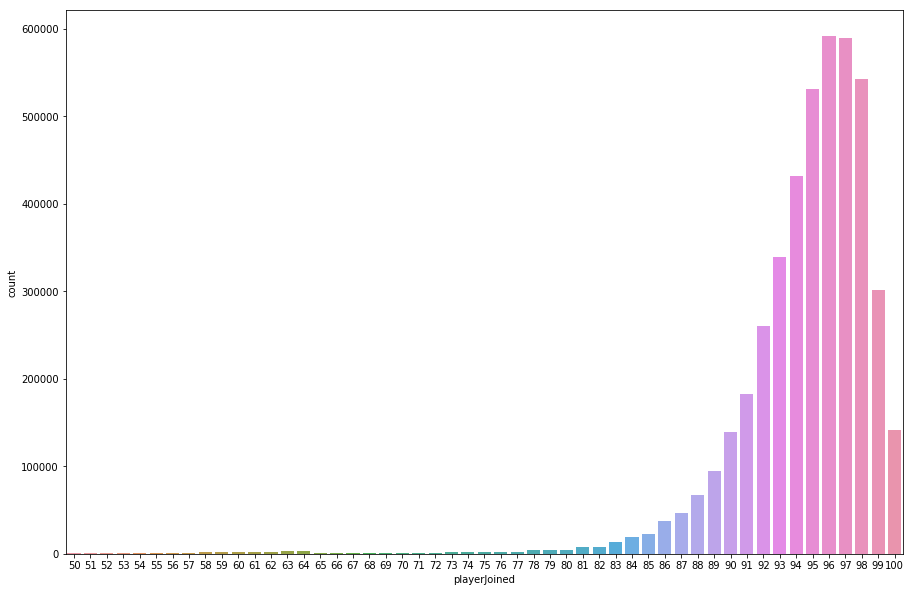

In [5]:
train0 = Train.copy()
train0['playerJoined'] = train0.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train0[train0.playerJoined>49].playerJoined)
plt.show()

In [6]:
train0['killsNorm'] = train0['kills']*((100-train0['playerJoined'])/100 + 1) 
train0['damageDealtNorm'] = train0['damageDealt']*((100-train0['playerJoined'])/100 + 1)
train0[['playerJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][1:8]

,playerJoined,kills,killsNorm,damageDealt,damageDealtNorm
1,91,0,0.00,91.470,99.70230
2,98,0,0.00,68.000,69.36000
3,91,0,0.00,32.900,35.86100
4,97,1,1.03,100.000,103.00000
5,95,1,1.05,100.000,105.00000
6,97,0,0.00,0.000,0.00000
7,96,0,0.00,8.538,8.87952


In [7]:
train0['healsAndBoosts'] = train0['heals']+train0['boosts']
train0['totalDistance'] = train0['walkDistance']+train0['rideDistance']+train0['swimDistance']

In [8]:
train0['boostsPerWalkDistance'] = train0['boosts']/(train0['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0. Strange.
train0['boostsPerWalkDistance'].fillna(0, inplace=True)
train0['healsPerWalkDistance'] = train0['heals']/(train0['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0. Strange.
train0['healsPerWalkDistance'].fillna(0, inplace=True)
train0['healsAndBoostsPerWalkDistance'] = train0['healsAndBoosts']/(train0['walkDistance']+1) #The +1 is to avoid infinity.
train0['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
train0[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][40:45]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
40,327.30,1,0.003046,1,0.003046,2,0.006092
41,128.80,0,0.000000,0,0.000000,0,0.000000
42,52.52,0,0.000000,0,0.000000,0,0.000000
43,534.10,1,0.001869,0,0.000000,1,0.001869
44,2576.00,4,0.001552,6,0.002328,10,0.003880


In [9]:
# # processing-1
# train0['dummyswim']=0
# train0['dummyride']=0
# for i in range(len(train0['swimDistance'])):
# #     print(i)
#     if train0['swimDistance'][i]>0:
#         train0['dummyswim'][i]=1
#     if ['rideDistance'][i]>0:
#         data['dummyride'][i]=1
# print(data['dummyswim'].value_counts())
# print(data['dummyride'].value_counts())

In [9]:
train0.shape

(4446966, 37)

In [10]:
train0_splitfordummyswim = train0[train0.swimDistance==0].loc[:,['Id']]
train0_splitfordummyswim['dummySwim'] = 0
train1t = pd.merge(train0,train0_splitfordummyswim,how='left',on = 'Id')
train1t['dummySwim'].fillna(1,inplace=True)
print(train1t.shape)
train1t[['Id','swimDistance','dummySwim']].head()

(4446966, 38)


,Id,swimDistance,dummySwim
0,7f96b2f878858a,0.00,0.0
1,eef90569b9d03c,11.04,1.0
2,1eaf90ac73de72,0.00,0.0
3,4616d365dd2853,0.00,0.0
4,315c96c26c9aac,0.00,0.0


In [11]:
train0_splitfordummyride = train1t[train1t.rideDistance==0].loc[:,['Id']]
train0_splitfordummyride['dummyRide'] = 0
train1 = pd.merge(train1t,train0_splitfordummyride,how='left',on = 'Id')
train1['dummyRide'].fillna(1,inplace=True)
print(train1.shape)
train1[['Id','rideDistance','dummyRide']].head()

(4446966, 39)


,Id,rideDistance,dummyRide
0,7f96b2f878858a,0.0000,0.0
1,eef90569b9d03c,0.0045,1.0
2,1eaf90ac73de72,0.0000,0.0
3,4616d365dd2853,0.0000,0.0
4,315c96c26c9aac,0.0000,0.0


In [12]:
train1['killsPerWalkDistance'] = train1['kills']/(train1['walkDistance']+1) 
train1['killsPerWalkDistance'].fillna(0, inplace=True)
train1[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
4115816,29,0.0,0.0,29.0,0.7500
3083358,30,0.0,0.0,30.0,0.7500
422093,30,0.0,0.0,30.0,1.0000
2394021,31,0.0,0.0,31.0,0.5385
3057746,31,0.0,0.0,31.0,0.7500
2998470,35,0.0,0.0,35.0,1.0000
1158891,36,0.0,0.0,36.0,0.5833
3062788,36,0.0,0.0,36.0,0.8667
1068513,38,0.0,0.0,38.0,0.8333
1702541,43,0.0,0.0,43.0,1.0000


In [13]:
train1['teamSize'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in train1['numGroups']]

In [14]:
train1[['matchType','teamSize']].head(20)

,matchType,teamSize
0,squad-fpp,2
1,squad-fpp,4
2,duo,2
3,squad-fpp,2
4,solo-fpp,1
5,squad-fpp,2
6,squad-fpp,2
7,solo-fpp,1
8,squad,2
9,squad,2


In [15]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446966 entries, 0 to 4446965
Data columns (total 41 columns):
Id                               object
groupId                          object
matchId                          object
assists                          int64
boosts                           int64
damageDealt                      float64
DBNOs                            int64
headshotKills                    int64
heals                            int64
killPlace                        int64
killPoints                       int64
kills                            int64
killStreaks                      int64
longestKill                      float64
matchDuration                    int64
matchType                        object
maxPlace                         int64
numGroups                        int64
rankPoints                       int64
revives                          int64
rideDistance                     float64
roadKills                        int64
swimDistance       

In [16]:
train1.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerJoined,killsNorm,damageDealtNorm,healsAndBoosts,totalDistance,boostsPerWalkDistance,healsPerWalkDistance,healsAndBoostsPerWalkDistance,dummySwim,dummyRide,killsPerWalkDistance,teamSize
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96,0.00,0.00000,0,244.8000,0.0,0.0,0.0,0.0,0.0,0.000000,2
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91,0.00,99.70230,0,1445.0445,0.0,0.0,0.0,1.0,1.0,0.000000,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98,0.00,69.36000,0,161.8000,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91,0.00,35.86100,0,202.7000,0.0,0.0,0.0,0.0,0.0,0.000000,2
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97,1.03,103.00000,0,49.7500,0.0,0.0,0.0,0.0,0.0,0.019704,1
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370,95,1.05,105.00000,0,34.7000,0.0,0.0,0.0,0.0,0.0,0.028011,2
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000,97,0.00,0.00000,0,13.5000,0.0,0.0,0.0,0.0,0.0,0.000000,2
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368,96,0.00,8.87952,0,3093.0000,0.0,0.0,0.0,0.0,1.0,0.000000,1
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.00,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704,97,0.00,53.14800,0,799.9000,0.0,0.0,0.0,0.0,0.0,0.000000,2
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.00,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143,97,0.00,38.38810,0,65.6700,0.0,0.0,0.0,0.0,0.0,0.000000,2


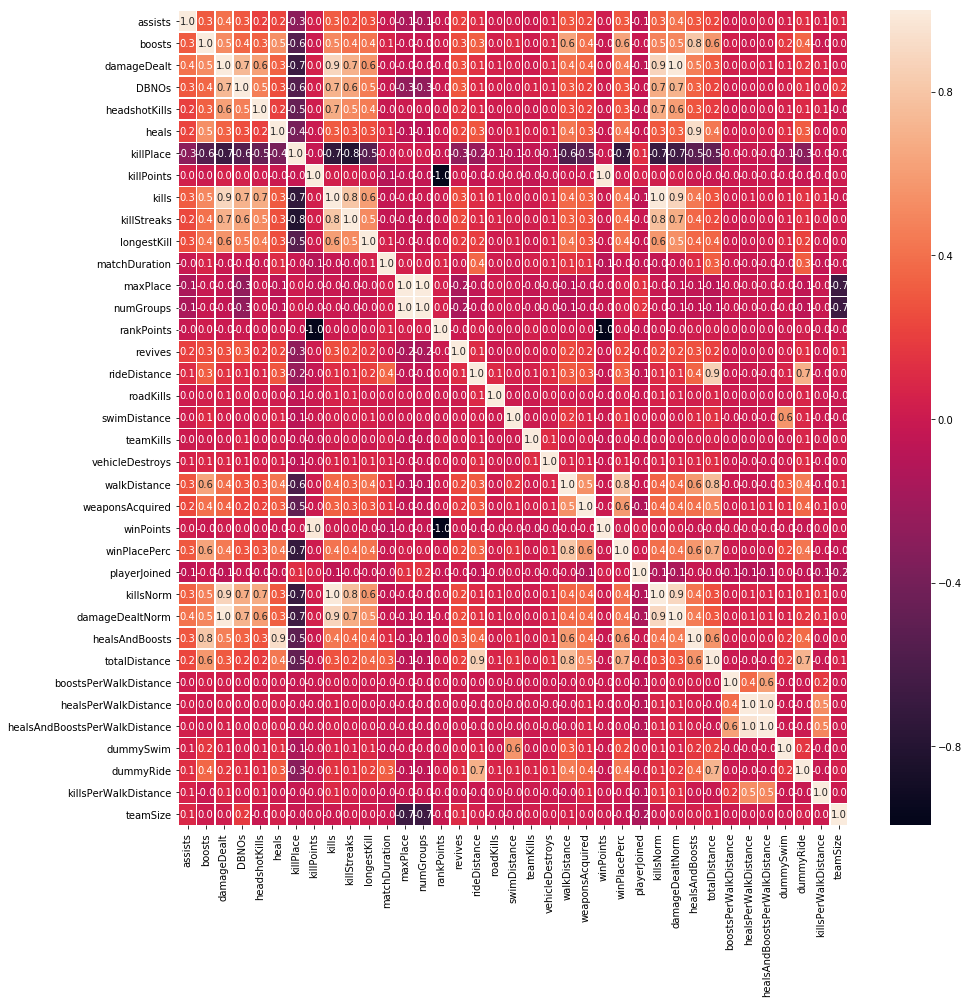

In [17]:
data = train1.copy()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()